## 182. Duplicate Emails



**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Find all duplicate emails

#### SQL Schema

```sql
Create table If Not Exists Person (id int, email varchar(255))
Truncate table Person
insert into Person (id, email) values ('1', 'a@b.com')
insert into Person (id, email) values ('2', 'c@d.com')
insert into Person (id, email) values ('3', 'a@b.com')

```

Table: Employee

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| email       | varchar |
+-------------+---------+ 
id is the primary key column for this table.
Each row of this table contains an email. The emails will not contain uppercase letters.
```


## Problem

Write an SQL query to report all the duplicate emails.

Return the result table in **any order**.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Person table:
+----+---------+
| id | email   |
+----+---------+
| 1  | a@b.com |
| 2  | c@d.com |
| 3  | a@b.com |
+----+---------+
```
**Output:**
```
+---------+
| Email   |
+---------+
| a@b.com |
+---------+
```

**Explanation**: a@b.com is repeated two times.

--- 

--- 

## Solution 1 - MSSQL

This is a simple `GROUP BY` `COUNT()` scenario.  We will try a solution using `DISTINCT` later on, but this way first.

I prefer using aggregate functions for this type of query because the logic is more readable and easier to understand.

#### The Plan:
Select a row, and the previous two rows using LAG() and then filter where all three rows are the same.


```sql
/* Write your T-SQL query statement below */
SELECT      email
FROM        Person p
GROUP BY    email
HAVING      COUNT(email) > 1


```

### Result

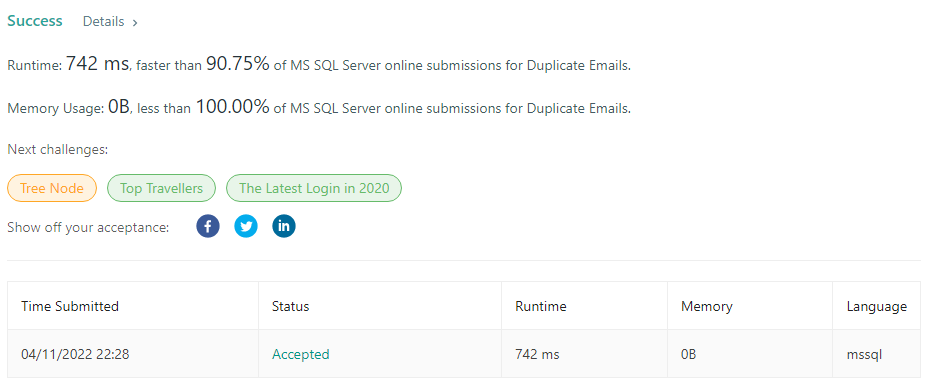



The results really suck.  Especially given how small the dataset is.

--- 

## Solution 2 - MSSQL - Use Distinct and a Self-Join

Just for giggles, let's check the performance.  Common belief is that DISTINCT is a code smell and has sluggish performance.



```sql
SELECT      DISTINCT p.email
FROM        Person p
            JOIN Person dupe ON dupe.email = p.email
                            AND dupe.Id <> p.Id
```

### Result

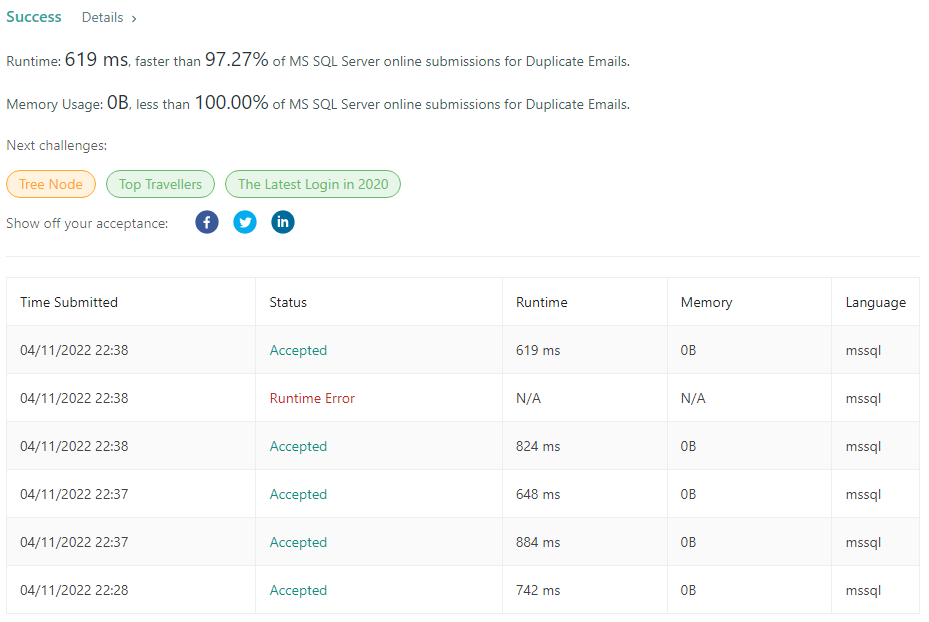



Results are good, but incosistency in performance for this small of a dataset implies that server load/queueing is what is causing the difference.

---

## Solution 3 - MySQL 

Pretty much the same thing in MySQL. 

```sql
# Write your MySQL query statement below
SELECT      email
FROM        Person p
GROUP BY    email
HAVING      COUNT(email) > 1
;

```



### Result

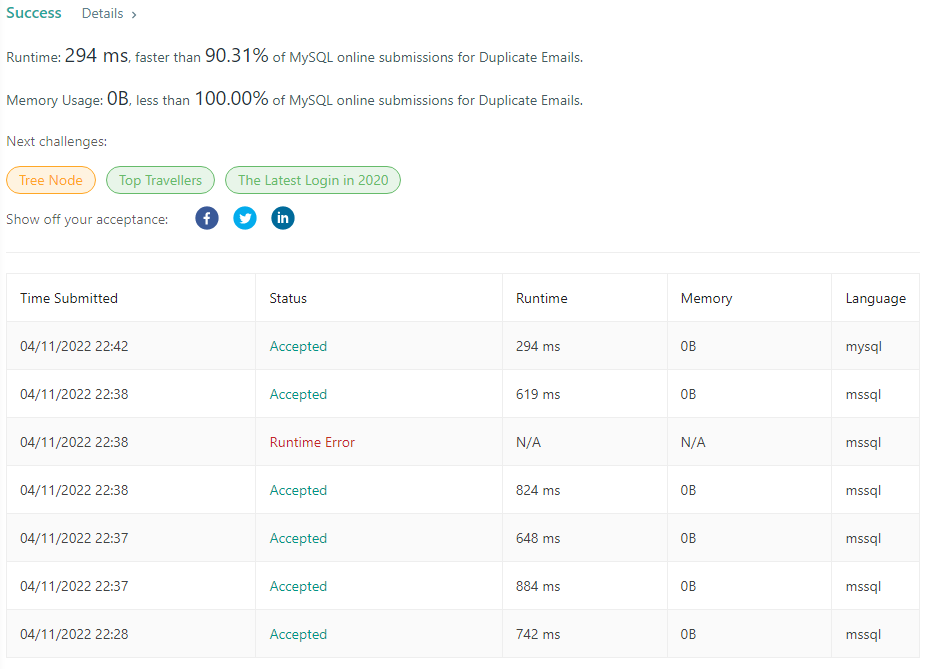




As usual MySQL is kicking butt on MSSQL.

--- 
